# Facebook's Prophet Library

## Importing the data

👇 Go on [trends.google.com](https://trends.google.com/trends/?geo=US) and retrieve the dataset representing the interest over time of the keyword `data science` since 2004 in the US. Once you get the dataset, import the data and display the first few rows

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')

## Display the data

👇Visualize the data by displaying the first few rows of the dataframe

In [12]:
df

,Unnamed: 0,Time,DFF,CPIAUCSL,CPILFESL,UNRATE,WTISPLC,INDPRO,MABMM301USM189S,A576RC1
0,0,1960-01-01,3.99,1.24095,2.00669,5.2,2.97,10.03675,NaN,7.05509
1,1,1960-02-01,3.97,1.41379,2.34114,4.8,2.97,6.96284,NaN,6.78233
2,2,1960-03-01,3.84,1.51881,2.00000,5.4,2.97,4.49722,NaN,5.93518
3,3,1960-04-01,3.92,1.93237,2.00000,5.2,2.97,1.50636,NaN,5.56845
4,4,1960-05-01,3.85,1.82507,1.66113,5.1,2.97,-0.11438,NaN,4.94632
...,...,...,...,...,...,...,...,...,...,...
752,752,2022-09-01,2.56,8.21485,6.64296,3.5,84.26,4.73131,2.56370,9.07203
753,753,2022-10-01,3.08,7.76249,6.30176,3.7,87.55,3.18912,1.28501,8.07029
754,754,2022-11-01,3.78,7.13535,5.97198,3.6,84.37,1.98468,0.02623,7.43424
755,755,2022-12-01,4.10,6.44494,5.70386,3.5,76.44,1.14673,-1.31457,6.94998


In [13]:
df = df.drop('Unnamed: 0', axis=1)

In [16]:
df

,Time,DFF,CPIAUCSL,CPILFESL,UNRATE,WTISPLC,INDPRO,MABMM301USM189S,A576RC1
0,1960-01-01,3.99,1.24095,2.00669,5.2,2.97,10.03675,NaN,7.05509
1,1960-02-01,3.97,1.41379,2.34114,4.8,2.97,6.96284,NaN,6.78233
2,1960-03-01,3.84,1.51881,2.00000,5.4,2.97,4.49722,NaN,5.93518
3,1960-04-01,3.92,1.93237,2.00000,5.2,2.97,1.50636,NaN,5.56845
4,1960-05-01,3.85,1.82507,1.66113,5.1,2.97,-0.11438,NaN,4.94632
...,...,...,...,...,...,...,...,...,...
752,2022-09-01,2.56,8.21485,6.64296,3.5,84.26,4.73131,2.56370,9.07203
753,2022-10-01,3.08,7.76249,6.30176,3.7,87.55,3.18912,1.28501,8.07029
754,2022-11-01,3.78,7.13535,5.97198,3.6,84.37,1.98468,0.02623,7.43424
755,2022-12-01,4.10,6.44494,5.70386,3.5,76.44,1.14673,-1.31457,6.94998


## Data Preprocessing

Facebook'Prophet library requires the data to be in a specific format

👇 Format the dataset as per Facebook Prophet's requirements.
Remember the dataframe should have a `ds` and `y` columns

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time             757 non-null    object 
 1   DFF              757 non-null    float64
 2   CPIAUCSL         757 non-null    float64
 3   CPILFESL         757 non-null    float64
 4   UNRATE           757 non-null    float64
 5   WTISPLC          757 non-null    float64
 6   INDPRO           757 non-null    float64
 7   MABMM301USM189S  744 non-null    float64
 8   A576RC1          757 non-null    float64
dtypes: float64(8), object(1)
memory usage: 53.4+ KB


In [25]:
#  create dataframe for arguments for prophet
df.columns = ['ds', 'y']

# rename columns to ds, datestamp and y, the target
df.rename(columns={'Time': 'ds', 'CPILFESL': 'y'}, inplace=True)

# convert ds object to datetime
df['ds'] = pd.to_datetime(df['ds'])

# create dataframe for prophet
df = df[['ds', 'y']]

/var/folders/s1/k27_hssx5pv_k8zzl718j2280000gn/T/ipykernel_13728/4002560654.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Time': 'ds', 'CPILFESL': 'y'}, inplace=True)
/var/folders/s1/k27_hssx5pv_k8zzl718j2280000gn/T/ipykernel_13728/4002560654.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = pd.to_datetime(df['ds'])


## Plotting the data

👇 Plot the data

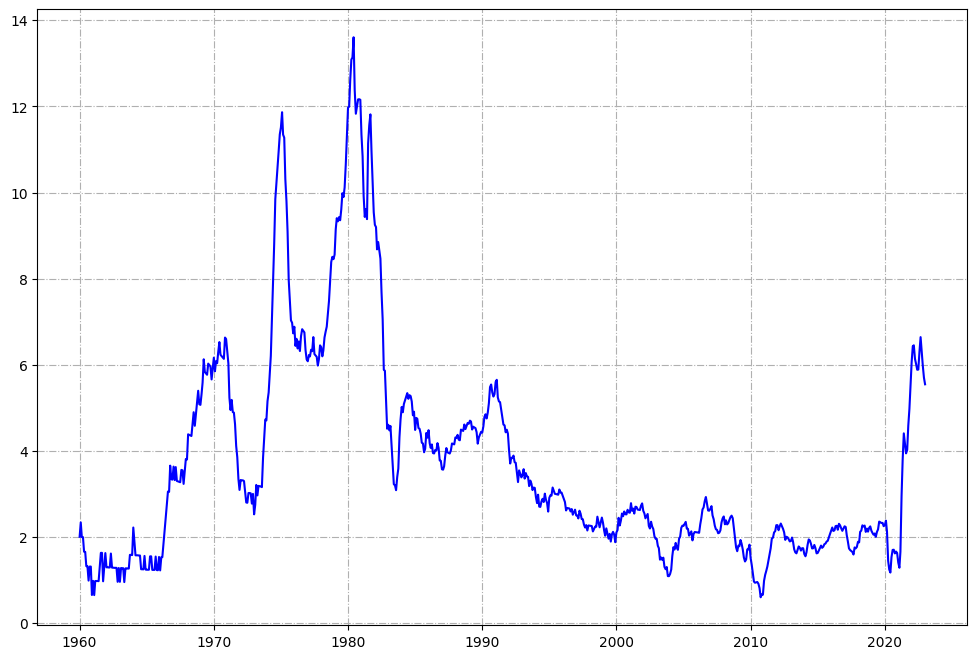

In [26]:
plt.figure(figsize=(12, 8))
plt.grid(linestyle='-.')

plt.plot(df['ds'], df['y'], 'b')
plt.show()

## Fitting the data

👇 Fit the data using Facebook's Prophet library. Make sure to use a train/test split. 


In [39]:
from prophet import Prophet
train = df.iloc[:500]
test = df.iloc[500:]

In [40]:
train.shape, test.shape

((500, 2), (257, 2))

In [41]:
train

,ds,y
0,1960-01-01,2.00669
1,1960-02-01,2.34114
2,1960-03-01,2.00000
3,1960-04-01,2.00000
4,1960-05-01,1.66113
...,...,...
495,2001-04-01,2.66223
496,2001-05-01,2.54566
497,2001-06-01,2.70569
498,2001-07-01,2.69972


In [42]:
model = Prophet(seasonality_mode='multiplicative', interval_width=0.95)
model.fit(train)

17:57:52 - cmdstanpy - INFO - Chain [1] start processing
17:57:52 - cmdstanpy - INFO - Chain [1] done processing


## Make future predictions

👇Before predicting future values with Facebook's Prophet library, you first need to create a placeholder dataframe that will eventually hold the predictions. Once you create the dataframe, try to predict 2 years in the future.

You can create the predictions' dataframe using `make_future_dataframe()`

In [43]:
horizon = 36
future = model.make_future_dataframe(periods=horizon, freq='MS')
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
531,2004-04-01,0.964092,-1.942877,3.988920
532,2004-05-01,0.936256,-2.243191,3.744992
533,2004-06-01,0.933227,-1.893612,3.936599
534,2004-07-01,0.891913,-1.905608,3.919381
535,2004-08-01,0.879757,-2.323756,3.793735


## Plotting the forecast

👇 It's time to visualize our forecast. Try to first plot it using [`model.plot(forecast)`](https://facebook.github.io/prophet/docs/quick_start.html)

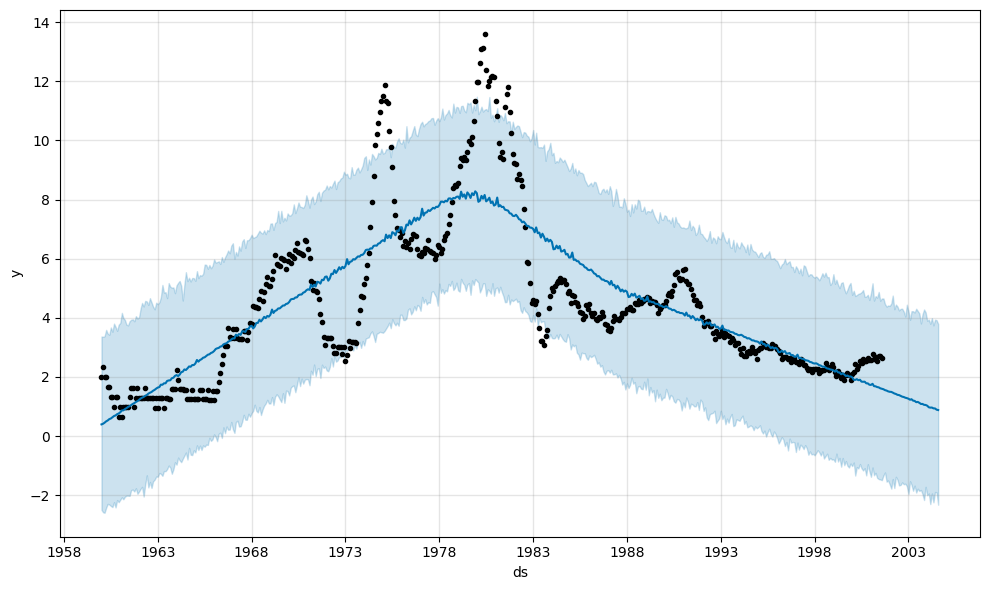

In [44]:
ax = model.plot(forecast);

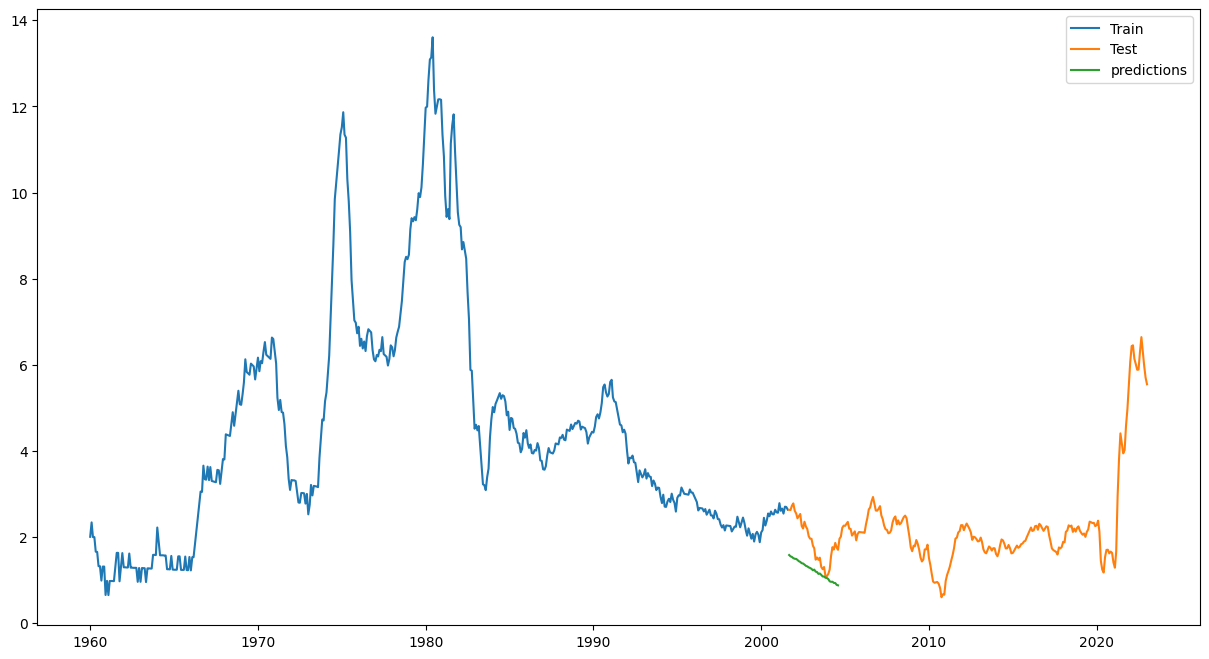

In [45]:
plt.figure(figsize=(15, 8))
plt.plot(train['ds'], train['y'], label="Train")
plt.plot(test['ds'], test['y'], label="Test")
plt.plot(forecast[-horizon:]['ds'], forecast[-horizon:]['yhat'], label="predictions")
plt.legend(loc="best")
plt.show()

**WRITE AGAIN**
👉 From 2004 to 2018 we can see the train data and the forecasted data from 2018 to 2020.

We can also notice a shaded region behind the plot which represents the 95% uncertainty interval.

The black dots represent the original data

## Time Series' trend and seasonality

👇 Plot the trend and yearly seasonality of the time series. This can be done using the `plot_components()` function from Facebook's Prophet Library

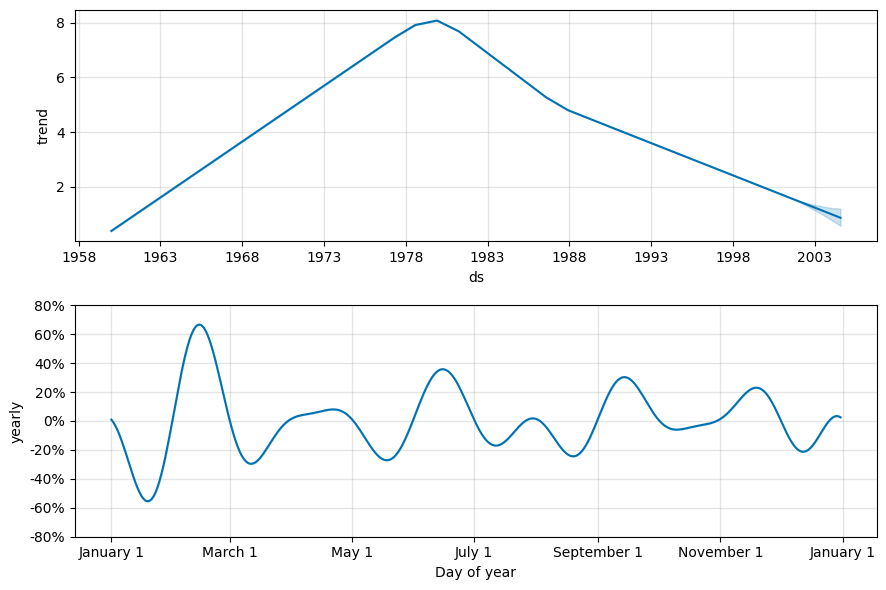

In [46]:
model.plot_components(forecast);

## Evaluating the model with cross-validation!

👇 Using `cross_validation()` and `performance_metrics()` from [prophet.diagnostics](https://facebook.github.io/prophet/docs/diagnostics.html), evaluate the performance of your model

More precisely, create a Time Series K-fold CV with
- train sets of size 5 years
- horizon val sizes of 1 years
- shifting each fold by 180 days

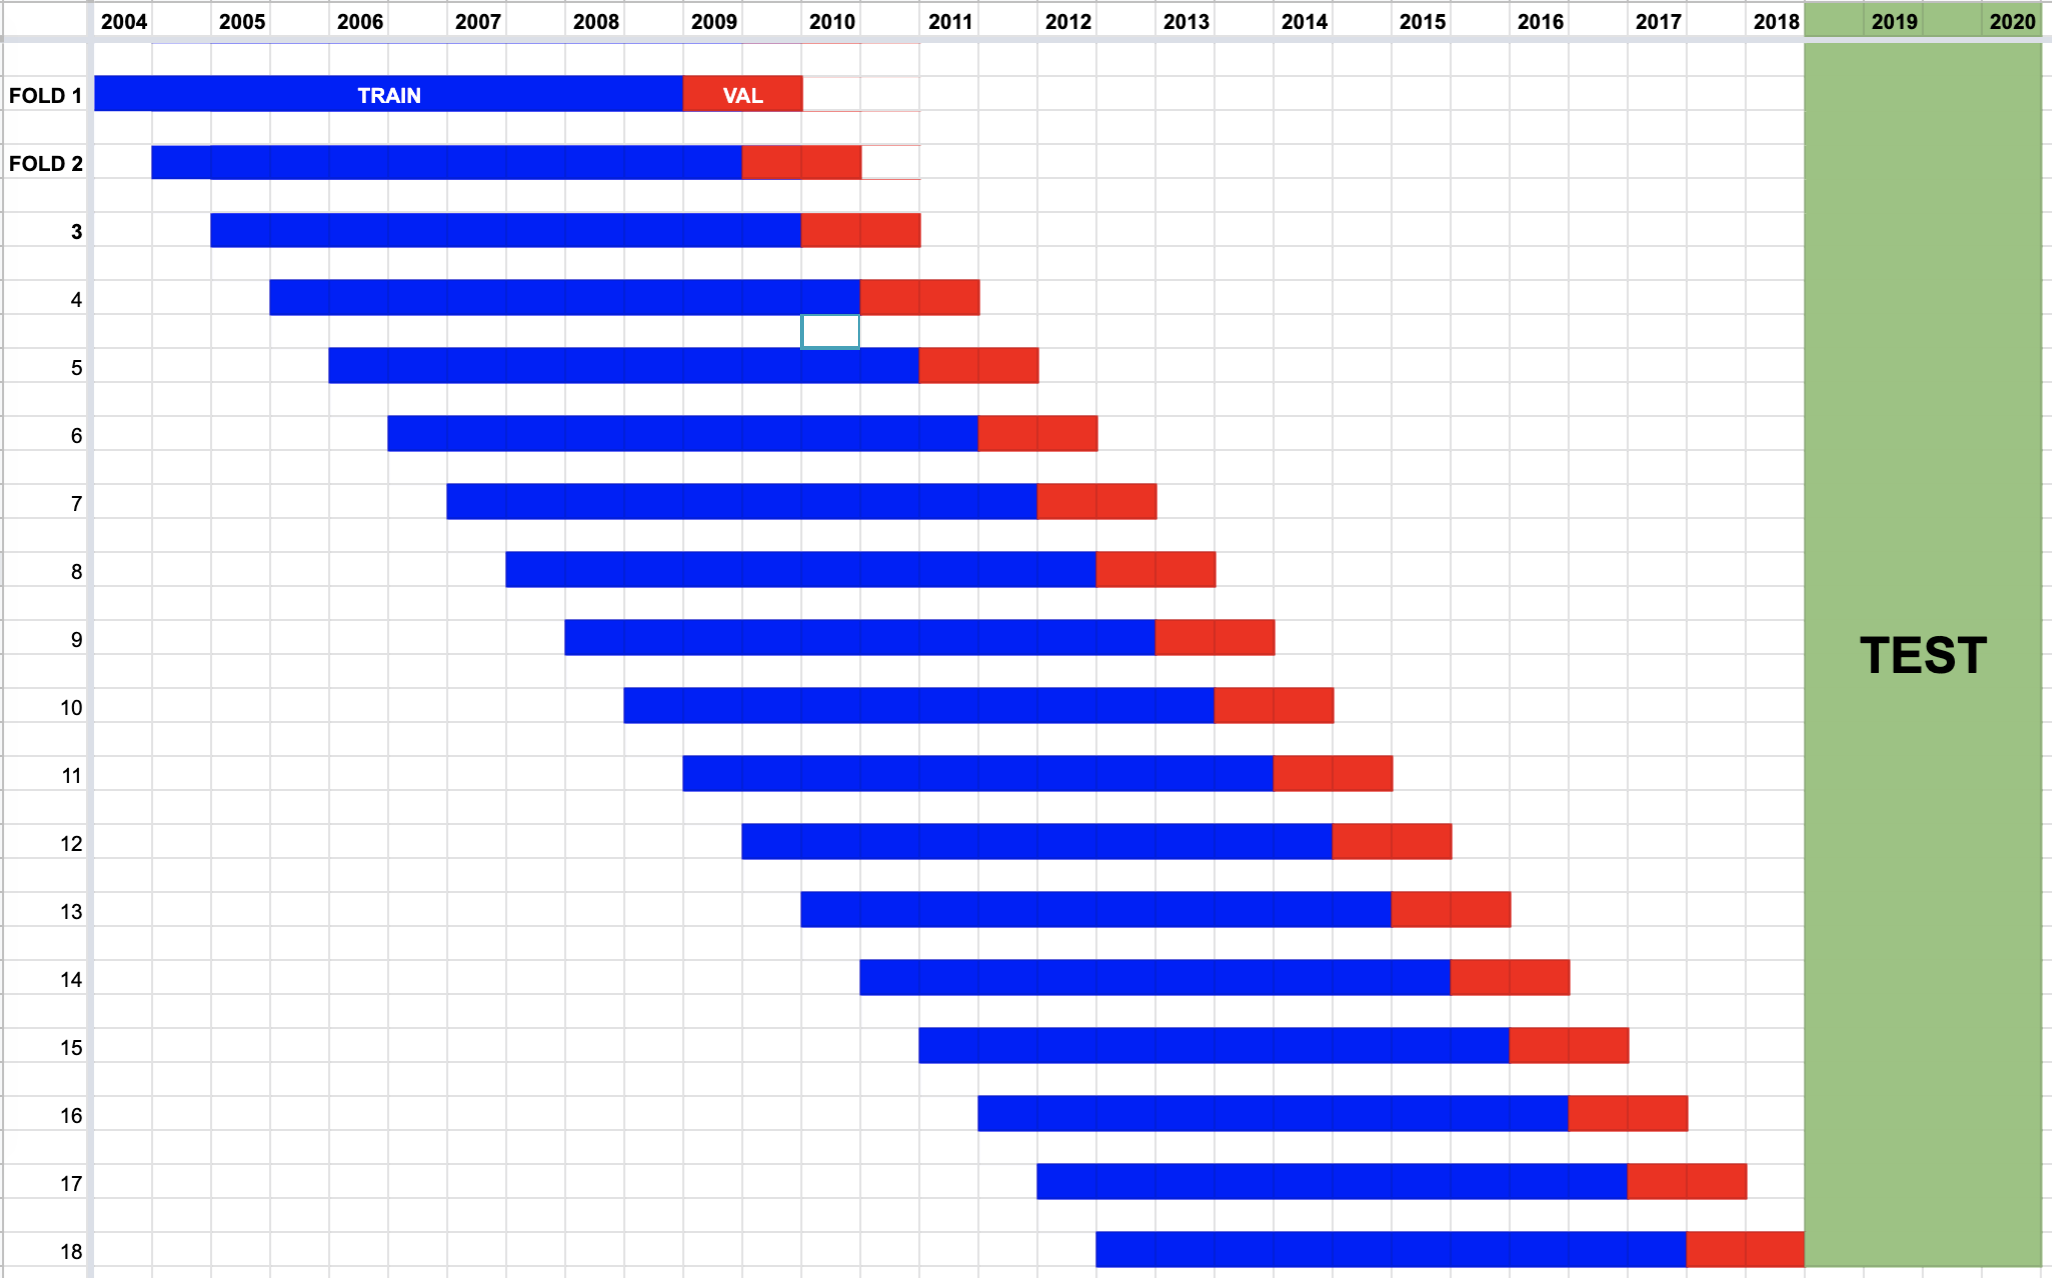

In [47]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

In [48]:
cv_results = cross_validation(model=model, initial=f'{365 * 5} days', horizon='365 days', period='180 days')
cv_results

  0%|          | 0/73 [00:00<?, ?it/s]

17:58:08 - cmdstanpy - INFO - Chain [1] start processing
17:58:08 - cmdstanpy - INFO - Chain [1] done processing
17:58:08 - cmdstanpy - INFO - Chain [1] start processing
17:58:09 - cmdstanpy - INFO - Chain [1] done processing
17:58:09 - cmdstanpy - INFO - Chain [1] start processing
17:58:09 - cmdstanpy - INFO - Chain [1] done processing
17:58:09 - cmdstanpy - INFO - Chain [1] start processing
17:58:10 - cmdstanpy - INFO - Chain [1] done processing
17:58:10 - cmdstanpy - INFO - Chain [1] start processing
17:58:11 - cmdstanpy - INFO - Chain [1] done processing
17:58:11 - cmdstanpy - INFO - Chain [1] start processing
17:58:11 - cmdstanpy - INFO - Chain [1] done processing
17:58:11 - cmdstanpy - INFO - Chain [1] start processing
17:58:13 - cmdstanpy - INFO - Chain [1] done processing
17:58:13 - cmdstanpy - INFO - Chain [1] start processing
17:58:13 - cmdstanpy - INFO - Chain [1] done processing
17:58:13 - cmdstanpy - INFO - Chain [1] start processing
17:58:13 - cmdstanpy - INFO - Chain [1]

17:58:25 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-03-01,1.486586,0.927160,2.066879,1.24224,1965-02-06
1,1965-04-01,1.459545,0.929598,1.981573,1.55280,1965-02-06
2,1965-05-01,1.374036,0.887745,1.909050,1.55280,1965-02-06
3,1965-06-01,1.355391,0.793672,1.908442,1.23839,1965-02-06
4,1965-07-01,1.352844,0.802571,1.929388,1.23839,1965-02-06
...,...,...,...,...,...,...
869,2001-04-01,1.196709,-2.163100,4.170322,2.66223,2000-08-01
870,2001-05-01,1.169945,-1.989573,4.356164,2.54566,2000-08-01
871,2001-06-01,1.146833,-2.018355,4.376235,2.70569,2000-08-01
872,2001-07-01,1.118379,-2.171827,4.088953,2.69972,2000-08-01


In [49]:
df_p = performance_metrics(cv_results)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,4.351420,2.086006,1.508047,0.338234,0.240223,0.307400,0.770115
1,38 days,4.187637,2.046372,1.482321,0.327141,0.240223,0.298262,0.793103
2,39 days,4.004070,2.001017,1.448919,0.316406,0.228801,0.293784,0.804598
3,40 days,3.952213,1.988017,1.439542,0.315245,0.228801,0.293748,0.804598
4,42 days,4.055405,2.013804,1.463382,0.313871,0.240223,0.293477,0.795977
...,...,...,...,...,...,...,...,...
315,361 days,6.664648,2.581598,1.870712,0.428630,0.283117,0.395809,0.704981
316,362 days,7.133731,2.670905,1.943361,0.453438,0.285625,0.407679,0.689655
317,363 days,7.160800,2.675967,1.957606,0.455005,0.285625,0.409936,0.689655
318,364 days,6.875985,2.622210,1.936445,0.450271,0.286893,0.412654,0.689655


In [50]:
from prophet.plot import plot_cross_validation_metric

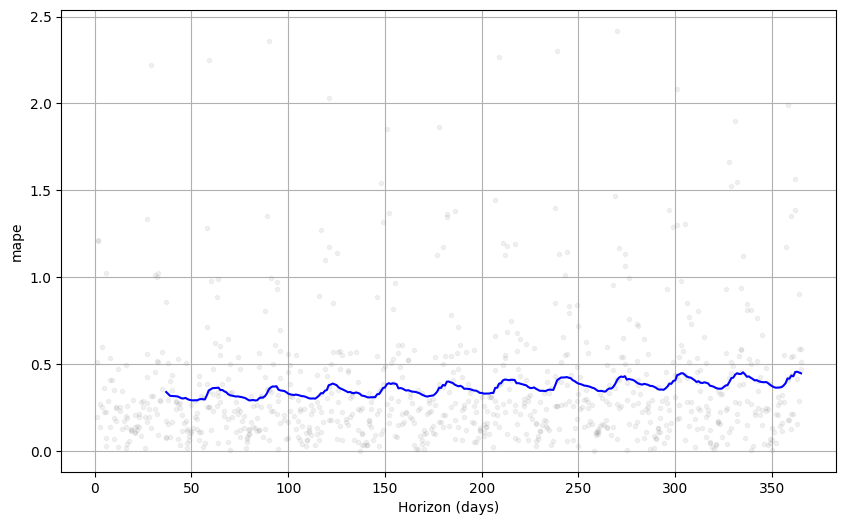

In [51]:
# Plot results below
plot_cross_validation_metric(cv_results, metric='mape');

⚠️ Don't forget to push the challenge to GitHub once you're done 😄